<p style="font-size: 48px; color: purple;">0.环境配置 1-3</p>

In [ ]:
!pip install androguard==3.3.5

In [3]:
import zipfile

# 定义文件路径
file2_path = r'C:\mynewpc\jupyter_notebook\data\apks\benign.zip'  
file1_path = r'C:\mynewpc\jupyter_notebook\data\apks\malware.zip'

# 打开并解压文件
with zipfile.ZipFile(file1_path, 'r') as zip_ref:
    zip_ref.extractall('./data') 
with zipfile.ZipFile(file2_path, 'r') as zip_ref:
    zip_ref.extractall('./data')

print("解压完成")

解压完成


<p style="font-size: 48px; color: purple;">1.数据预处理 4-7</p>

In [4]:

import os
import pandas as pd
from androguard.core.bytecodes.apk import APK
from androguard.core.analysis.analysis import Analysis
from androguard.core.bytecodes.dvm import DalvikVMFormat

def extract_features(apk_path):
    try:
        # 加载APK文件
        apk = APK(apk_path)
        dalvik_vm_format = DalvikVMFormat(apk.get_dex())
        vm_analysis = Analysis(dalvik_vm_format)

        # 提取权限
        permissions = apk.get_permissions()

        # 提取API调用
        api_calls = set()
        for method in dalvik_vm_format.get_methods():
            class_name = method.get_class_name()
            method_name = method.get_name()
            if class_name.startswith('Landroid/'):
                api_calls.add(f'{class_name}->{method_name}')

        # 构建特征字典
        features = {
            'num_permissions': len(permissions),
            'num_api_calls': len(api_calls),
        }

        for perm in permissions:
            features[f'perm_{perm}'] = 1

        for api in api_calls:
            features[f'api_{api}'] = 1

        return features
    except Exception as e:
        print(f"Error processing {apk_path}: {e}")
        return None

def process_apk_files(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".apk"):
            apk_path = os.path.join(directory, filename)
            features = extract_features(apk_path)
            if features:
                features['label'] = label
                data.append(features)
    return data

# 分析恶意APK文件
malware_directory = r"C:\mynewpc\jupyter_notebook\data\malware"
malware_data = process_apk_files(malware_directory, 1)

# 分析良性APK文件
benign_directory = r"C:\mynewpc\jupyter_notebook\data\benign"
benign_data = process_apk_files(benign_directory, 0)

# 合并数据
all_data = malware_data + benign_data
df = pd.DataFrame(all_data).fillna(0)

# 打印特征分析结果
print(df)

# 保存特征数据到CSV文件
df.to_csv('features_analysis.csv', index=False)

Name 'android:versionName' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:icon' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:screenOrientation' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:theme' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:screenOrientation' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The 

Error processing C:\mynewpc\jupyter_notebook\data\malware\275B40C0D6334E8C15136B7025CD2162860B6A0270601643DC0B67F08E57B675.apk: Corrupt extra field 1ac8 (size=24460)


Name 'android:versionName' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:icon' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:debuggable' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be b

Error processing C:\mynewpc\jupyter_notebook\data\malware\6AD60CD567A9F4756635DABDC219196337FF8DF52F4016AC81A6295874F8E5AF.apk: UTF-16 String is not null terminated! At offset=2222


Name 'android:versionName' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:minSdkVersion' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:icon' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:debuggable' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:permission' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manife

Error processing C:\mynewpc\jupyter_notebook\data\malware\6F63B9CF00361BE771CF11FA9701BC929C8D1837FCAC15D37C41F21D38213E9A.apk: Corrupt extra field 751a (size=12382)


Name 'android:versionName' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:minSdkVersion' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:icon' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:debuggable' starts with 'android:' prefix! The Manifest seem

Error processing C:\mynewpc\jupyter_notebook\data\malware\8E41E929746A92AA17C76690DAE9BF39B7E69FDC6124CF4A634DF1B7542881E9.apk: Corrupt extra field faf6 (size=49074)


Name 'android:versionName' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:icon' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:value' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:label' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:screenOrientation' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:theme' starts with 'android:' prefix! The Manifest seems to be broken? Removing prefix.
Name 'android:name' starts with 'android:' prefix! The Manifest see

      num_permissions  num_api_calls  perm_android.permission.GET_TASKS  \
0                  11              0                                1.0   
1                   8              0                                0.0   
2                   0              0                                0.0   
3                   5              0                                0.0   
4                  22              0                                1.0   
...               ...            ...                                ...   
2991                0              0                                0.0   
2992                7              0                                1.0   
2993                4              0                                0.0   
2994                0              0                                0.0   
2995                6              0                                0.0   

      perm_android.permission.INTERNET  \
0                                  1.0   
1              

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
import joblib

# 加载数据
df = pd.read_csv('features_analysis.csv')

# 分割特征和标签
X = df.drop(columns=['label'])
y = df['label']

In [2]:

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# 标准化特征

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)

<p style="font-size: 48px; color: purple;">2.基础模型训练与评估 8-11</p>

In [15]:
# 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=8)
rf_model.fit(X_train, y_train)

# 预测
y_pred_rf = rf_model.predict(X_test)

# 输出分类报告和混淆矩阵
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       213
           1       0.94      0.97      0.96       387

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.94      0.94      0.94       600

[[189  24]
 [ 10 377]]


In [16]:
# 训练LightGBM模型
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
lgb_model = LGBMClassifier(n_estimators=100, random_state=12)
lgb_model.fit(X_train, y_train)

# 预测
y_pred_lgb = lgb_model.predict(X_test)

# 输出分类报告和混淆矩阵
print("LightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1609, number of negative: 787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9277
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 3062
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671536 -> initscore=0.715140
[LightGBM] [Info] Start training from score 0.715140
LightGBM Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       213
           1       0.95      0.97      0.96       387

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

[[194  19]
 [ 13 374]]


In [17]:
# 训练XGBoost模型
xgb_model = XGBClassifier(n_estimators=100, random_state=1)
xgb_model.fit(X_train, y_train)

# 预测
y_pred_xgb = xgb_model.predict(X_test)

# 输出分类报告和混淆矩阵
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       213
           1       0.95      0.96      0.96       387

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.94      0.94      0.94       600

[[193  20]
 [ 15 372]]


<p style="font-size: 48px; color: purple;">3.超参数模型训练与评估 12-16</p>

In [4]:
from sklearn.model_selection import GridSearchCV
#随机森林的超参数调优
# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 创建随机森林模型和网格搜索对象
rf_model = RandomForestClassifier(random_state=8)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 训练网格搜索模型
grid_search.fit(X_train, y_train)

# 获取最佳模型和最佳参数
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# 使用最佳模型进行预测
y_pred_best_rf = best_rf_model.predict(X_test)

# 输出分类报告和混淆矩阵
print("Best Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       213
           1       0.95      0.97      0.96       387

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

[[193  20]
 [ 13 374]]


In [5]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import randint, uniform
from xgboost.callback import TrainingCallback  # 导入 TrainingCallback
# XGBoost的超参数调优
# 定义初始的XGBoost模型
xgb_model = xgb.XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=6,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=52,
    verbosity=1,  # 使用 verbosity 参数
    use_label_encoder=False  # 避免警告
)

# 定义回调类
class PrintProgressCallback(TrainingCallback):
    def after_iteration(self, model, epoch, evals_log):
        if epoch % 10 == 0:  # 每10轮输出一次
            print(f"Iteration {epoch}:")
            for data_name, evals in evals_log.items():
                for metric, values in evals.items():
                    print(f"  {data_name} {metric}: {values[-1]}")

# 将数据转换为 DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 定义参数
params = {
    'learning_rate': 0.01,
    'n_estimators': 1000,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'random_state': 52,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# 训练模型
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=params['n_estimators'],
    evals=[(dtrain, 'train'), (dtest, 'test')],
    verbose_eval=60,  # 每10轮输出一次
    callbacks=[PrintProgressCallback()]
)

# 预测
y_pred_xgb = bst.predict(dtest)
y_pred_xgb = (y_pred_xgb > 0.5).astype(int)

# 输出分类报告和混淆矩阵
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

# 交叉验证
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='roc_auc')  # 使用 AUC 作为评分标准
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:16:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration 0:
  train auc: 0.9395075982225143
  test auc: 0.9342116436777426
[0]	train-auc:0.93951	test-auc:0.93421
Iteration 10:
  train auc: 0.9664758983576341
  test auc: 0.9573946694811418
Iteration 20:
  train auc: 0.9663092689390919
  test auc: 0.9568912181096917
Iteration 30:
  train auc: 0.9668024446352039
  test auc: 0.9576372966481057
Iteration 40:
  train auc: 0.9672134901913712
  test auc: 0.9583591124698232
Iteration 50:
  train auc: 0.9681331108448902
  test auc: 0.9584319006199125
Iteration 60:
  train auc: 0.9681492999590139
  test auc: 0.9585228858075239
[60]	train-auc:0.96815	test-auc:0.95852
Iteration 70:
  train auc: 0.9681852318952399
  test auc: 0.9585835425992648
Iteration 80:
  train auc: 0.9689623093731812
  test auc: 0.95878371001201
Iteration 90:
  train auc: 0.9690843200137725
  test auc: 0.9585774769200908
Iteration 100:
  train auc: 0.9692130432138787
  test auc: 0.9588928922371438
Iteration 110:
  train auc: 0.9700525080096629
  test auc: 0.959924057696740

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Cross-validation scores: [0.96888993 0.9690107  0.96890666]
Mean cross-validation score: 0.9689357627514822


In [6]:
# 超参数调优
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(500, 2000),
    'max_depth': randint(3, 7),
    'min_child_weight': randint(1, 5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.2),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(
    xgb.XGBClassifier(random_state=52, verbosity=1, use_label_encoder=False),  # 使用 verbosity 参数
    param_distributions=param_distributions,
    n_iter=10,  # 减少迭代次数
    cv=3,  # 减少交叉验证的折数
    scoring='roc_auc',  # 使用 AUC 作为评分标准
    n_jobs=-1,
    verbose=2  # 添加 verbose 参数
)
random_search.fit(X_train, y_train)

# 输出最佳参数
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# 使用最佳参数重新训练模型
best_params['eval_metric'] = 'auc'
best_bst = xgb.train(
    best_params,
    dtrain,
    num_boost_round=best_params['n_estimators'],
    evals=[(dtrain, 'train'), (dtest, 'test')],
    verbose_eval=60,  # 每10轮输出一次
    callbacks=[PrintProgressCallback()]
)

# 预测
y_pred_best_xgb = best_bst.predict(dtest)
y_pred_best_xgb = (y_pred_best_xgb > 0.5).astype(int)

# 输出分类报告和混淆矩阵
print("Optimized XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_best_xgb))
print(confusion_matrix(y_test, y_pred_best_xgb))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found: {'colsample_bytree': np.float64(0.6104312479469106), 'gamma': np.float64(0.009367080189275656), 'learning_rate': np.float64(0.0808075167551641), 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1797, 'reg_alpha': np.float64(0.2856039984550631), 'reg_lambda': np.float64(0.47311468641020654), 'subsample': np.float64(0.9400889735723335)}
[0]	train-auc:0.91807	test-auc:0.90164
Iteration 0:
  train auc: 0.9180740008355163
  test auc: 0.901638946512841


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Iteration 10:
  train auc: 0.9587698800347157
  test auc: 0.9396828862927782
Iteration 20:
  train auc: 0.966092097895968
  test auc: 0.952287367616552
Iteration 30:
  train auc: 0.9694708844705331
  test auc: 0.9599301233759144
Iteration 40:
  train auc: 0.9709401452913764
  test auc: 0.9619985199742815
Iteration 50:
  train auc: 0.973239789209837
  test auc: 0.9630418167922262
[60]	train-auc:0.97430	test-auc:0.96501
Iteration 60:
  train auc: 0.9742995839002814
  test auc: 0.9650070968446337
Iteration 70:
  train auc: 0.9753483226103485
  test auc: 0.9660200652667079
Iteration 80:
  train auc: 0.9762158222135179
  test auc: 0.9658987516832259
Iteration 90:
  train auc: 0.976463792059121
  test auc: 0.9664446628088947
Iteration 100:
  train auc: 0.9770900343762019
  test auc: 0.9671907413473086
Iteration 110:
  train auc: 0.9779922813462709
  test auc: 0.9676335359270177
[120]	train-auc:0.97859	test-auc:0.96733
Iteration 120:
  train auc: 0.9785920682817348
  test auc: 0.9673302519683

In [7]:
# lightgbm的超参数调优
# 定义初始的 LightGBM 模型
import lightgbm as lgb  # 导入 lightgbm 库
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=6,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    verbose=1  # 使用 verbose 参数
)

# 定义参数分布
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(500, 2000),
    'max_depth': randint(3, 15),
    'num_leaves': randint(31, 100),
    'min_child_samples': randint(10, 100),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

# 使用 RandomizedSearchCV 进行超参数调优
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_distributions,
    n_iter=10,  # 减少迭代次数
    cv=3,  # 减少交叉验证的折数
    scoring='roc_auc',  # 使用 AUC 作为评分标准
    n_jobs=-1,
    verbose=2  # 添加 verbose 参数
)

# 拟合模型
random_search.fit(X_train, y_train)

# 输出最佳参数
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# 使用最佳参数重新训练模型
best_lgb_model = lgb.LGBMClassifier(**best_params, random_state=42, verbose=1)
best_lgb_model.fit(X_train, y_train)

# 预测
y_pred_best_lgb = best_lgb_model.predict(X_test)

# 输出分类报告和混淆矩阵
print("Optimized LightGBM Model Evaluation:")
print(classification_report(y_test, y_pred_best_lgb))
print(confusion_matrix(y_test, y_pred_best_lgb))

# 交叉验证
cv_scores = cross_val_score(best_lgb_model, X_train, y_train, cv=3, scoring='roc_auc')  # 使用 AUC 作为评分标准
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 1609, number of negative: 787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10195
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 3368
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671536 -> initscore=0.715140
[LightGBM] [Info] Start training from score 0.715140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

<p style="font-size: 48px; color: purple;">4.模型融合 17-19</p>

In [20]:
from sklearn.ensemble import VotingClassifier
# 创建投票分类器
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='soft'  # 可以选择 'hard' 或 'soft'
)

# 训练投票分类器
voting_model.fit(X_train, y_train)

# 预测
y_pred_voting = voting_model.predict(X_test )

# 输出分类报告和混淆矩阵
print("Voting Classifier Model(soft) Evaluation:")
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

[LightGBM] [Info] Number of positive: 1609, number of negative: 787
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9277
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 3062
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671536 -> initscore=0.715140
[LightGBM] [Info] Start training from score 0.715140
Voting Classifier Model(soft) Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       213
           1       0.95      0.97      0.96       387

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600

[[193  20]
 [ 12 375]]


In [21]:
from sklearn.ensemble import VotingClassifier
# 创建投票分类器
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lgb', lgb_model)],
    voting='hard'  # 可以选择 'hard' 或 'soft'
)

# 训练投票分类器
voting_model.fit(X_train, y_train)

# 预测
y_pred_voting = voting_model.predict(X_test )

# 输出分类报告和混淆矩阵
print("Voting Classifier(hard) Model Evaluation:")
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

[LightGBM] [Info] Number of positive: 1609, number of negative: 787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9277
[LightGBM] [Info] Number of data points in the train set: 2396, number of used features: 3062
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671536 -> initscore=0.715140
[LightGBM] [Info] Start training from score 0.715140
Voting Classifier(hard) Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       213
           1       0.95      0.97      0.96       387

    accuracy                           0.94       600
   macro avg       0.94      0.93      0.94       600
weighted avg       0.94      0.94      0.94       600

[[192  21]
 [ 13 374]]


<p style="font-size: 48px; color: purple;">5.后期改进与升级 20-25</p>

在进一步查阅相关资料后，我们发现使用这些的模型也可能得到不错的效果，下面是ada提升融合模型，最佳管道模型和简单的tensorflow深度学习模型的运行结果

In [4]:
#ada模型使用提升的方法融合模型
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 定义基模型
base_clf = DecisionTreeClassifier(
    max_depth=3,  # 调整最大深度
    min_samples_split=10,  # 调整分裂所需的最小样本数
    min_samples_leaf=5,  # 调整叶节点所需的最小样本数
    max_features='sqrt'  # 调整考虑的特征数量
)


# 定义AdaBoost模型
ada_boost_clf = AdaBoostClassifier(
    estimator=base_clf,
    n_estimators=50,
    learning_rate=0.01,
    random_state=200
)

# 训练模型
ada_boost_clf.fit(X_train, y_train)

# 预测
y_pred_voting = ada_boost_clf.predict(X_test )

# 输出分类报告和混淆矩阵
print("ada Voting Classifier Model Evaluation:")
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ada Voting Classifier Model Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.10      0.18       213
           1       0.67      1.00      0.80       387

    accuracy                           0.68       600
   macro avg       0.81      0.55      0.49       600
weighted avg       0.77      0.68      0.58       600

[[ 21 192]
 [  1 386]]


In [9]:
from sklearn.linear_model import LogisticRegression
#升级的投票模型
best_log_clf = LogisticRegression(
    C=0.01,                      # 正则化强度的倒数
    random_state=100,           # 随机种子
    solver='lbfgs',            # 优化算法
    max_iter=1000,             # 最大迭代次数
    penalty='l2',              # 使用L2正则化
    tol=1e-4,                  # 停止标准
    class_weight='balanced',   # 类权重
    multi_class='auto'        # 多类分类策略
)
from sklearn.tree import DecisionTreeClassifier

best_tree_clf = DecisionTreeClassifier(
    max_depth=10,              # 树的最大深度
    random_state=100,          # 随机种子
    criterion='gini',         # 分裂标准
    min_samples_split=2,      # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,       # 叶节点所需的最小样本数
    max_features=None,        # 寻找最佳分裂时考虑的特征数量
    max_leaf_nodes=None,      # 最大叶节点数
    min_impurity_decrease=0.0 # 节点分裂所需的最小不纯度减少
)
from sklearn.svm import SVC

best_svm_clf = SVC(
    C=0.1,                       # 正则化参数
    kernel='rbf',             # 核函数
    probability=True,         # 启用概率估计
    random_state=100,          # 随机种子
    gamma='scale',            # 核函数参数
    tol=1e-3,                 # 停止标准
    class_weight='balanced',  # 类权重
    max_iter=100,              # 最大迭代次数
    decision_function_shape='ovr' # 决策函数形状
)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# 定义硬投票分类器
best_voting_clf = VotingClassifier(
    estimators=[('lr', best_log_clf), ('tree', best_tree_clf), ('svm', best_svm_clf)],
    voting='hard'
)

# 定义管道
best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting_clf', best_voting_clf)
])

# 训练最终模型
best_pipeline.fit(X_train, y_train)
# 在测试集上评估模型性能
y_pred = best_pipeline.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

# 输出分类报告
print("pp_voting_clf Classification Report:")
print(classification_report(y_test, y_pred))

# 输出混淆矩阵
print("pp_voting_clf Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Test Accuracy:  0.9133333333333333
pp_voting_clf Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       213
           1       0.96      0.90      0.93       387

    accuracy                           0.91       600
   macro avg       0.90      0.92      0.91       600
weighted avg       0.92      0.91      0.91       600

pp_voting_clf Confusion Matrix:
[[198  15]
 [ 37 350]]


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



def create_mlp_model(input_dim):
    model = Sequential([
        Dense(1024, input_dim=input_dim, activation='relu'),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.00001, weight_decay=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# 创建数据集
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).shuffle(buffer_size=len(X_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

# 实例化模型
input_dim = X_train.shape[1]
model = create_mlp_model(input_dim)

# 训练模型
num_epochs = 1000
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset, verbose=1)

# 评估模型
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Deep Learning Model Evaluation:")
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# 保存模型
model.save('mlp_model.h5')

Epoch 1/1000


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.6032 - loss: 0.7444 - val_accuracy: 0.6650 - val_loss: 0.6764
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.8762 - loss: 0.3545 - val_accuracy: 0.6650 - val_loss: 0.6481
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9369 - loss: 0.2583 - val_accuracy: 0.6667 - val_loss: 0.6281
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9598 - loss: 0.2091 - val_accuracy: 0.7083 - val_loss: 0.6146
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9787 - loss: 0.1599 - val_accuracy: 0.7283 - val_loss: 0.6083
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9772 - loss: 0.1516 - val_accuracy: 0.8050 - val_loss: 0.5953
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9811 - loss: 0.1232 - val_accuracy: 0.7717 - val_loss: 0.5868
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9880 - loss: 0.1093 - val_accuracy: 0.8250

Deep Learning Model Evaluation:
              precision    recall  f1-score   support

           0       0.71      0.06      0.10       213
           1       0.66      0.99      0.79       387

    accuracy                           0.66       600
   macro avg       0.68      0.52      0.45       600
weighted avg       0.67      0.66      0.55       600

[[ 12 201]
 [  5 382]]


实际的结果并不理想，修改参数可能会有一定的提升空间，但考虑到时间因素，运行一次需要消耗2小时左右，项目主要是经典机器学习模型，并且这里得到的结果很不理想，只留下了一些想法

<p style="font-size: 48px; color: purple;">6.总结分析 26-31</p>

根据整体实验，在提取了权限，api调用后，最终得出lightgbm的平均效果最好，达到了95%，在基础模型和调优模型中都略优于其他模型，
但使用融合模型之后具有最佳的效果，下面使用脚本作图直观的看到了结果，其中红色字体为最好，蓝色字体为最差

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'Model': ['RandFor', 'LightGBM', 'XGBoost', 'B RandFor', 'O XGBoost', 'O LightGBM', 'Voting Classifier'],
    'Precision_0': [0.95, 0.94, 0.93, 0.94, 0.94, 0.93, 0.94],
    'Recall_0': [0.89, 0.91, 0.91, 0.91, 0.88, 0.91, 0.91],
    'F1-Score_0': [0.92, 0.92, 0.92, 0.92, 0.91, 0.92, 0.92],
    'Precision_1': [0.94, 0.95, 0.95, 0.95, 0.94, 0.95, 0.95],
    'Recall_1': [0.97, 0.97, 0.96, 0.97, 0.97, 0.96, 0.97],
    'F1-Score_1': [0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.96],
    'Accuracy': [0.94, 0.95, 0.94, 0.94, 0.94, 0.94, 0.95],
    'Group': ['Base', 'Base', 'Base', 'Optimized', 'Optimized', 'Optimized', 'Ensemble']
}

df = pd.DataFrame(data)

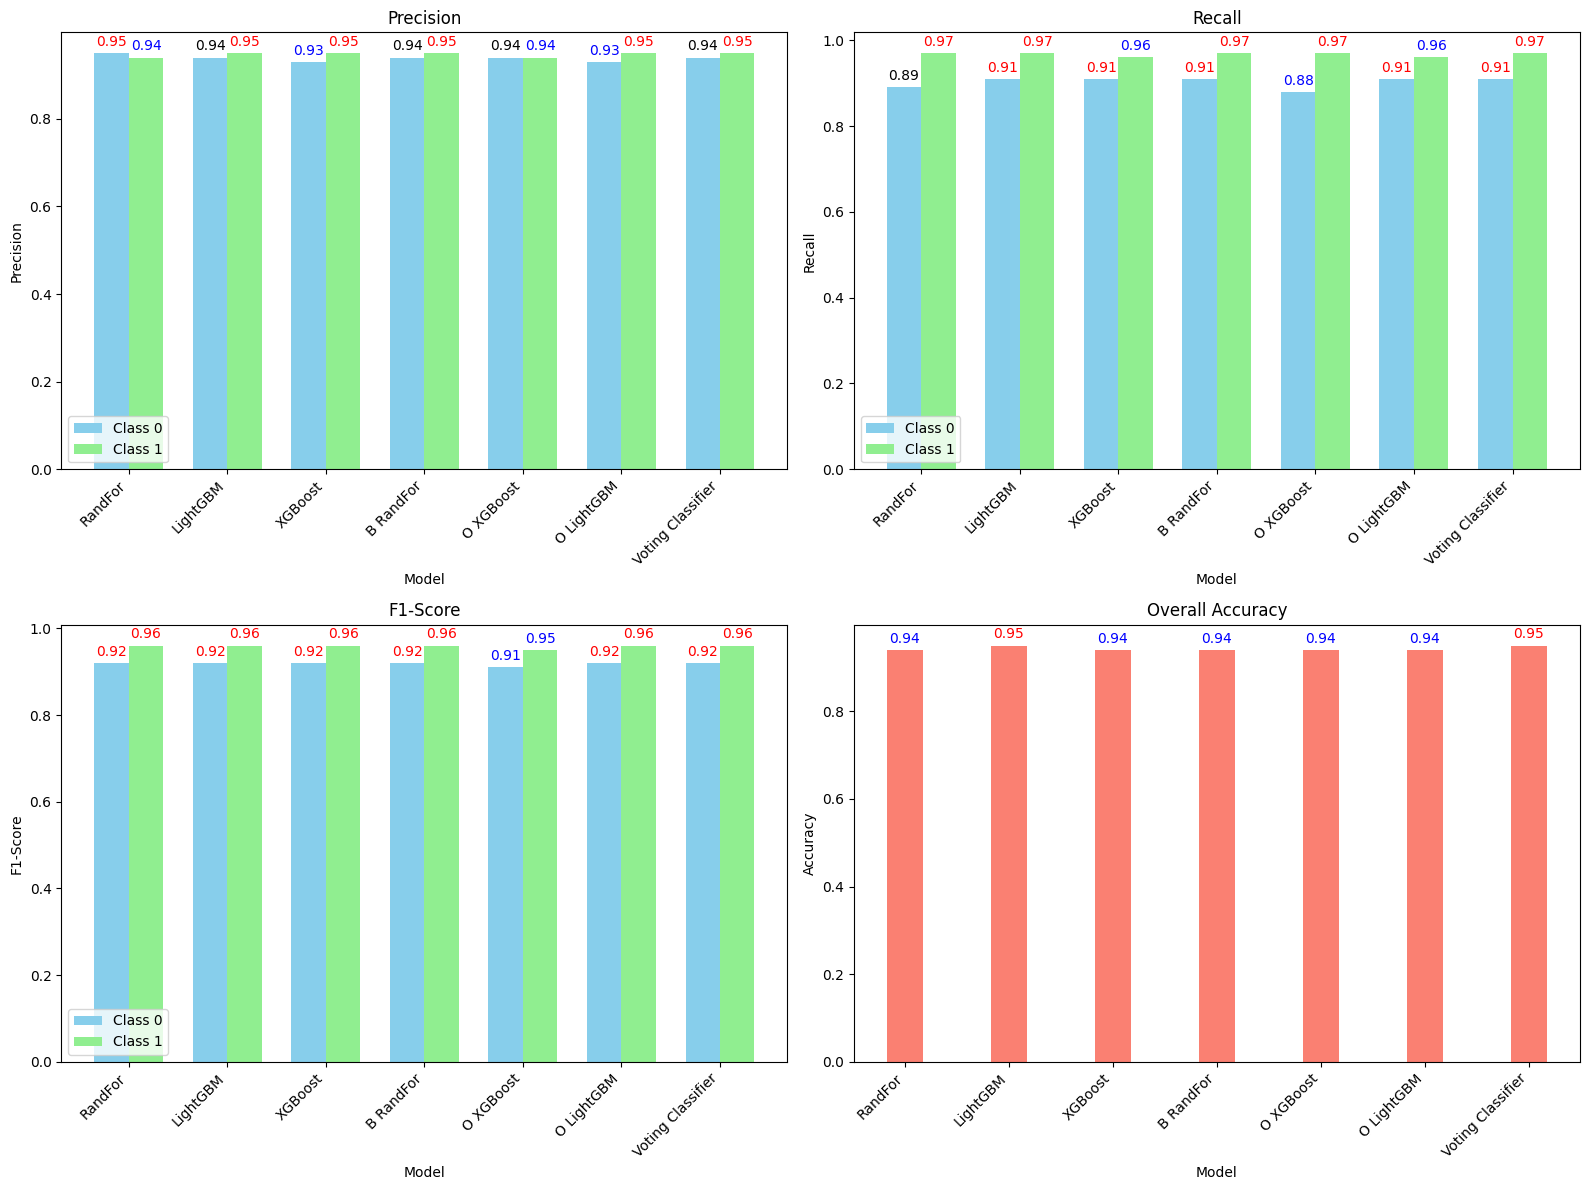

In [13]:
import numpy as np
# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 定义颜色
high_color = 'red'
low_color = 'blue'

# 绘制 Precision 图
x = np.arange(len(df['Model']))
width = 0.35

max_precision_0 = df['Precision_0'].idxmax()
min_precision_0 = df['Precision_0'].idxmin()
max_precision_1 = df['Precision_1'].idxmax()
min_precision_1 = df['Precision_1'].idxmin()

max_indices_0 = df[df['Precision_0'] == df['Precision_0'].max()].index
min_indices_0 = df[df['Precision_0'] == df['Precision_0'].min()].index
max_indices_1 = df[df['Precision_1'] == df['Precision_1'].max()].index
min_indices_1 = df[df['Precision_1'] == df['Precision_1'].min()].index

bars1 = axes[0, 0].bar(x - width/2, df['Precision_0'], width, label='Class 0', color='skyblue')
bars2 = axes[0, 0].bar(x + width/2, df['Precision_1'], width, label='Class 1', color='lightgreen')

axes[0, 0].set_title('Precision')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[0, 0].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[0, 0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 Recall 图
max_recall_0 = df['Recall_0'].idxmax()
min_recall_0 = df['Recall_0'].idxmin()
max_recall_1 = df['Recall_1'].idxmax()
min_recall_1 = df['Recall_1'].idxmin()

max_indices_0 = df[df['Recall_0'] == df['Recall_0'].max()].index
min_indices_0 = df[df['Recall_0'] == df['Recall_0'].min()].index
max_indices_1 = df[df['Recall_1'] == df['Recall_1'].max()].index
min_indices_1 = df[df['Recall_1'] == df['Recall_1'].min()].index

bars1 = axes[0, 1].bar(x - width/2, df['Recall_0'], width, label='Class 0', color='skyblue')
bars2 = axes[0, 1].bar(x + width/2, df['Recall_1'], width, label='Class 1', color='lightgreen')

axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[0, 1].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[0, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 F1-Score 图
max_f1_0 = df['F1-Score_0'].idxmax()
min_f1_0 = df['F1-Score_0'].idxmin()
max_f1_1 = df['F1-Score_1'].idxmax()
min_f1_1 = df['F1-Score_1'].idxmin()

max_indices_0 = df[df['F1-Score_0'] == df['F1-Score_0'].max()].index
min_indices_0 = df[df['F1-Score_0'] == df['F1-Score_0'].min()].index
max_indices_1 = df[df['F1-Score_1'] == df['F1-Score_1'].max()].index
min_indices_1 = df[df['F1-Score_1'] == df['F1-Score_1'].min()].index

bars1 = axes[1, 0].bar(x - width/2, df['F1-Score_0'], width, label='Class 0', color='skyblue')
bars2 = axes[1, 0].bar(x + width/2, df['F1-Score_1'], width, label='Class 1', color='lightgreen')

axes[1, 0].set_title('F1-Score')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[1, 0].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[1, 0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 Accuracy 图
max_accuracy = df['Accuracy'].idxmax()
min_accuracy = df['Accuracy'].idxmin()

max_indices = df[df['Accuracy'] == df['Accuracy'].max()].index
min_indices = df[df['Accuracy'] == df['Accuracy'].min()].index

bars = axes[1, 1].bar(x, df['Accuracy'], width, color='salmon')

axes[1, 1].set_title('Overall Accuracy')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(df['Model'], rotation=45, ha='right')

# 添加数据标签
for i, bar in enumerate(bars):
    height = bar.get_height()
    color = high_color if i in max_indices else low_color if i in min_indices else 'black'
    axes[1, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

在此基础上，我们对比了在优化模块中使用到的其他模型，下面是lightgbm和软投票融合模型和他们的对比

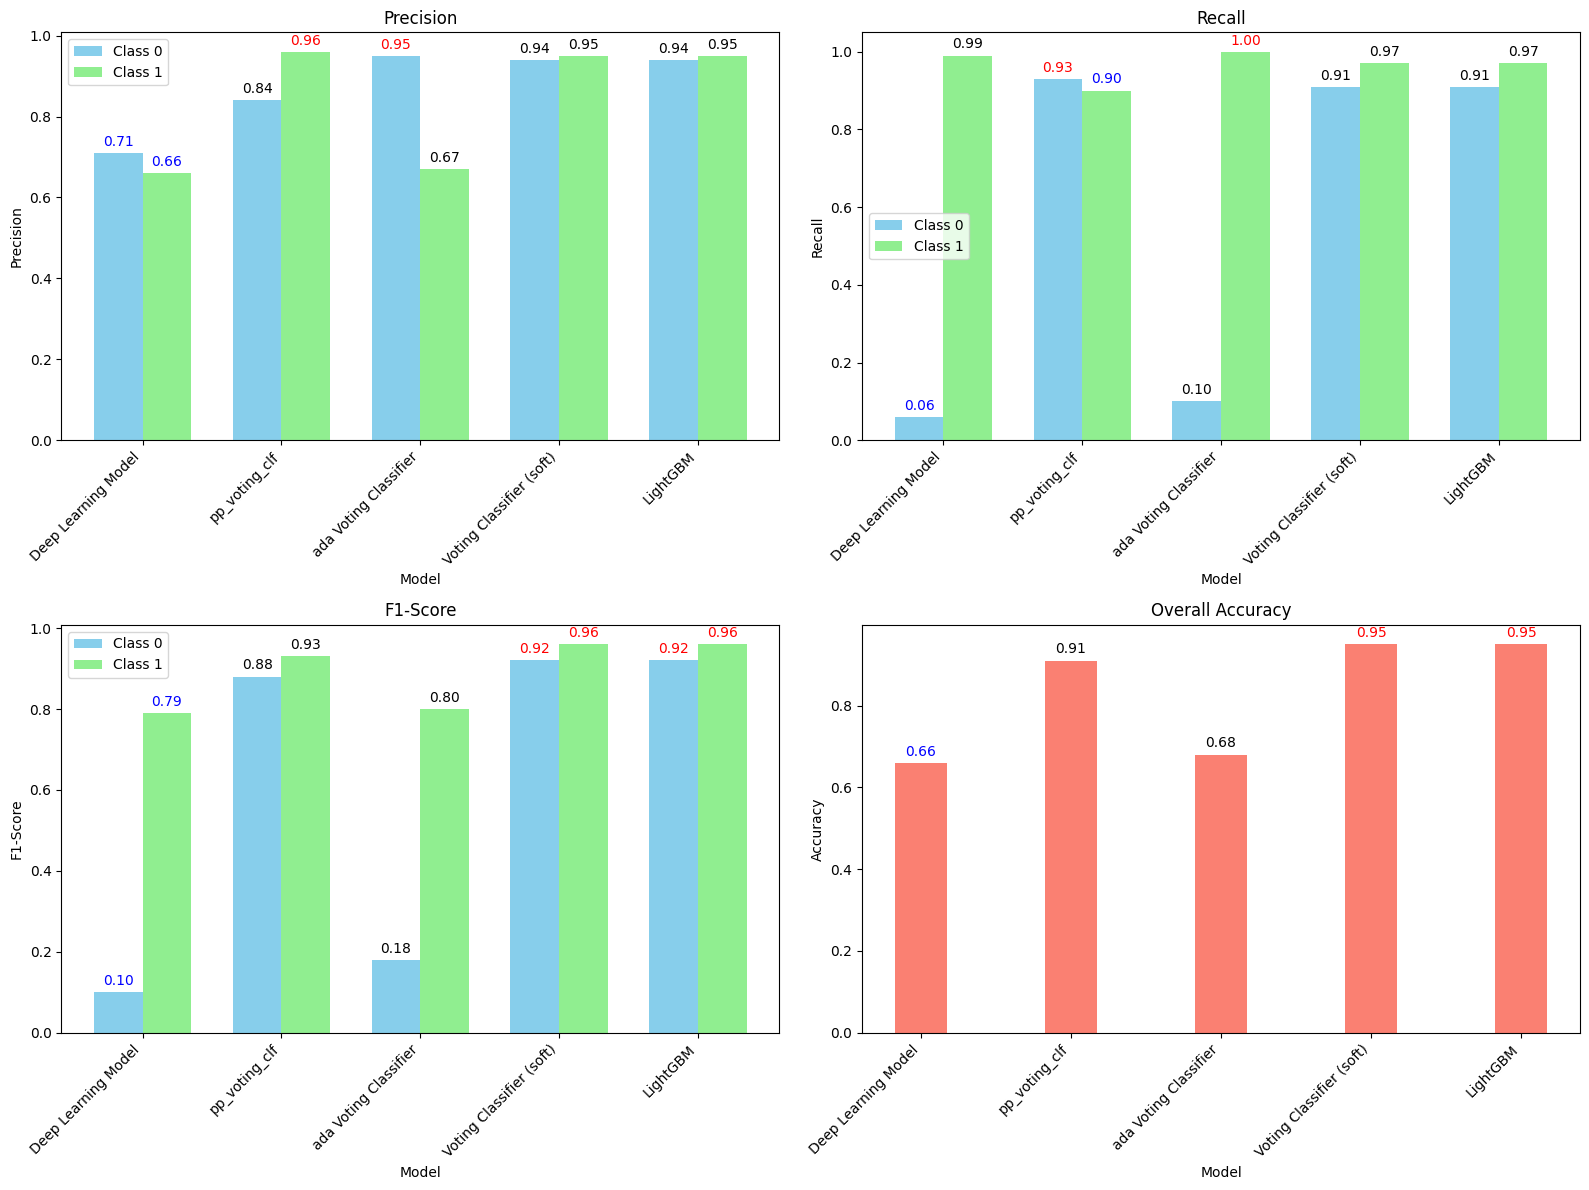

In [16]:

data2 = {
    'Model': ['Deep Learning Model', 'pp_voting_clf', 'ada Voting Classifier', 'Voting Classifier (soft)', 'LightGBM'],
    'Precision_0': [0.71, 0.84, 0.95, 0.94, 0.94],
    'Recall_0': [0.06, 0.93, 0.10, 0.91, 0.91],
    'F1-Score_0': [0.10, 0.88, 0.18, 0.92, 0.92],
    'Precision_1': [0.66, 0.96, 0.67, 0.95, 0.95],
    'Recall_1': [0.99, 0.90, 1.00, 0.97, 0.97],
    'F1-Score_1': [0.79, 0.93, 0.80, 0.96, 0.96],
    'Accuracy': [0.66, 0.91, 0.68, 0.95, 0.95],
    'Group': ['Base', 'Optimized', 'Base', 'Ensemble', 'Base']
}

# 将数据转换为 DataFrame
df = pd.DataFrame(data2)

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 定义颜色
high_color = 'red'
low_color = 'blue'

# 绘制 Precision 图
x = np.arange(len(df['Model']))
width = 0.35

max_precision_0 = df['Precision_0'].idxmax()
min_precision_0 = df['Precision_0'].idxmin()
max_precision_1 = df['Precision_1'].idxmax()
min_precision_1 = df['Precision_1'].idxmin()

max_indices_0 = df[df['Precision_0'] == df['Precision_0'].max()].index
min_indices_0 = df[df['Precision_0'] == df['Precision_0'].min()].index
max_indices_1 = df[df['Precision_1'] == df['Precision_1'].max()].index
min_indices_1 = df[df['Precision_1'] == df['Precision_1'].min()].index

bars1 = axes[0, 0].bar(x - width/2, df['Precision_0'], width, label='Class 0', color='skyblue')
bars2 = axes[0, 0].bar(x + width/2, df['Precision_1'], width, label='Class 1', color='lightgreen')

axes[0, 0].set_title('Precision')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[0, 0].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[0, 0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 Recall 图
max_recall_0 = df['Recall_0'].idxmax()
min_recall_0 = df['Recall_0'].idxmin()
max_recall_1 = df['Recall_1'].idxmax()
min_recall_1 = df['Recall_1'].idxmin()

max_indices_0 = df[df['Recall_0'] == df['Recall_0'].max()].index
min_indices_0 = df[df['Recall_0'] == df['Recall_0'].min()].index
max_indices_1 = df[df['Recall_1'] == df['Recall_1'].max()].index
min_indices_1 = df[df['Recall_1'] == df['Recall_1'].min()].index

bars1 = axes[0, 1].bar(x - width/2, df['Recall_0'], width, label='Class 0', color='skyblue')
bars2 = axes[0, 1].bar(x + width/2, df['Recall_1'], width, label='Class 1', color='lightgreen')

axes[0, 1].set_title('Recall')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[0, 1].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[0, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 F1-Score 图
max_f1_0 = df['F1-Score_0'].idxmax()
min_f1_0 = df['F1-Score_0'].idxmin()
max_f1_1 = df['F1-Score_1'].idxmax()
min_f1_1 = df['F1-Score_1'].idxmin()

max_indices_0 = df[df['F1-Score_0'] == df['F1-Score_0'].max()].index
min_indices_0 = df[df['F1-Score_0'] == df['F1-Score_0'].min()].index
max_indices_1 = df[df['F1-Score_1'] == df['F1-Score_1'].max()].index
min_indices_1 = df[df['F1-Score_1'] == df['F1-Score_1'].min()].index

bars1 = axes[1, 0].bar(x - width/2, df['F1-Score_0'], width, label='Class 0', color='skyblue')
bars2 = axes[1, 0].bar(x + width/2, df['F1-Score_1'], width, label='Class 1', color='lightgreen')

axes[1, 0].set_title('F1-Score')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(df['Model'], rotation=45, ha='right')
axes[1, 0].legend()

# 添加数据标签
for i, bar in enumerate(bars1 + bars2):
    height = bar.get_height()
    if i < len(bars1):
        color = high_color if i in max_indices_0 else low_color if i in min_indices_0 else 'black'
    else:
        color = high_color if i - len(bars1) in max_indices_1 else low_color if i - len(bars1) in min_indices_1 else 'black'
    axes[1, 0].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 绘制 Accuracy 图
max_accuracy = df['Accuracy'].idxmax()
min_accuracy = df['Accuracy'].idxmin()

max_indices = df[df['Accuracy'] == df['Accuracy'].max()].index
min_indices = df[df['Accuracy'] == df['Accuracy'].min()].index

bars = axes[1, 1].bar(x, df['Accuracy'], width, color='salmon')

axes[1, 1].set_title('Overall Accuracy')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(df['Model'], rotation=45, ha='right')

# 添加数据标签
for i, bar in enumerate(bars):
    height = bar.get_height()
    color = high_color if i in max_indices else low_color if i in min_indices else 'black'
    axes[1, 1].annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', color=color)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()